<a href="https://colab.research.google.com/github/DickyDescta/Python-project/blob/main/DAA_pertemuan_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def recur_fibo(n):
    if n <= 1:
        return n
    else:
        return recur_fibo(n - 1) + recur_fibo(n - 2)

nterms = 20
if nterms <= 0:
    print("Please enter a positive integer")
else:
    print("Fibonacci sequence:")
    for i in range(nterms):
        print(recur_fibo(i))


Fibonacci sequence:
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181


In [ ]:
def recur_fibo(n):
    if n <= 1:
        return n
    else:
        return recur_fibo(n - 1) + recur_fibo(n - 2)

# Input jumlah suku dari pengguna
try:
    nterms = int(input("Masukkan jumlah suku Fibonacci yang diinginkan: "))

    if nterms <= 0:
        print("Silakan masukkan bilangan bulat positif.")
    else:
        print(f"Urutan Fibonacci {nterms} suku:")
        for i in range(nterms):
            print(recur_fibo(i))
except ValueError:
    print("Input tidak valid. Harap masukkan bilangan bulat.")


Masukkan jumlah suku Fibonacci yang diinginkan: 30
Urutan Fibonacci 30 suku:
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765
10946
17711
28657
46368
75025
121393
196418
317811
514229


In [ ]:
# Daftar not dan frekuensinya
not_frequencies = {
    "B1": 1,
    "C6": 6,
    "A5": 5,
    "D3": 3
}

# Menyusun node berdasarkan frekuensi
nodes = sorted(not_frequencies.items(), key=lambda x: x[1])

# Menampilkan hasil
print("Node berdasarkan frekuensi:")
for not_name, frekuensi in nodes:
    print(f"Not: {not_name}, Frekuensi: {frekuensi}")


Node berdasarkan frekuensi:
Not: B1, Frekuensi: 1
Not: D3, Frekuensi: 3
Not: A5, Frekuensi: 5
Not: C6, Frekuensi: 6


In [ ]:
import heapq

# Daftar karakter dan frekuensinya
char_frequencies = {
    'a': 5,
    'b': 9,
    'c': 12,
    'd': 13,
    'e': 16,
    'f': 45
}

# Node untuk pohon Huffman
class Node:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

# Fungsi untuk membangun pohon Huffman
def build_huffman_tree(frequencies):
    heap = [Node(char, freq) for char, freq in frequencies.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        # Ambil dua node dengan frekuensi terendah
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)

        # Buat node baru dengan frekuensi gabungan
        merged = Node(None, left.freq + right.freq)
        merged.left = left
        merged.right = right

        # Masukkan kembali ke heap
        heapq.heappush(heap, merged)

    return heap[0]  # Kembalikan akar pohon

# Fungsi untuk menghasilkan kode Huffman
def generate_huffman_codes(node, prefix='', codebook={}):
    if node is not None:
        if node.char is not None:  # Jika node adalah daun
            codebook[node.char] = prefix
        generate_huffman_codes(node.left, prefix + '0', codebook)
        generate_huffman_codes(node.right, prefix + '1', codebook)
    return codebook

# Membangun pohon Huffman
huffman_tree_root = build_huffman_tree(char_frequencies)

# Menghasilkan kode Huffman
huffman_codes = generate_huffman_codes(huffman_tree_root)

# Menampilkan hasil
print("Karakter dan Kode Huffman:")
for char, code in huffman_codes.items():
    print(f"Karakter: {char}, Kode Huffman: {code}")


Karakter dan Kode Huffman:
Karakter: f, Kode Huffman: 0
Karakter: c, Kode Huffman: 100
Karakter: d, Kode Huffman: 101
Karakter: a, Kode Huffman: 1100
Karakter: b, Kode Huffman: 1101
Karakter: e, Kode Huffman: 111


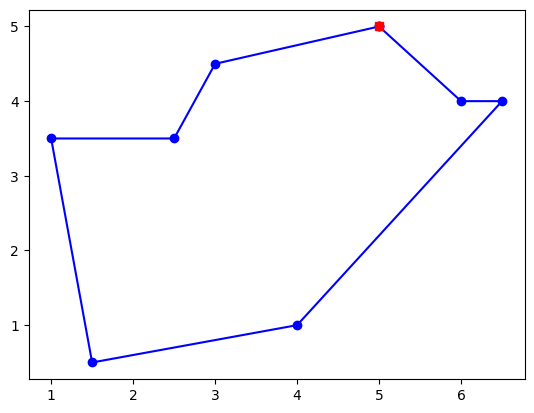

8 city tour; total distance = 14.7; time = 0.000 secs for dummy_TSP


In [ ]:
import time
import matplotlib.pyplot as plt

# Fungsi untuk menghitung jarak total dari tur
def total_distance(tour):
    return sum(abs(tour[i] - tour[i-1]) for i in range(1, len(tour)))

# Fungsi untuk memplot tur
def plot_tour(algorithm, cities):
    "Apply a TSP algorithm to cities, and plot the resulting tour."

    # Menghitung waktu eksekusi dan hasilkan tur
    t0 = time.time()
    tour = algorithm(cities)
    t1 = time.time()

    # Plot tur: Menutup tur dengan menghubungkan kembali ke titik awal
    plotline(list(tour) + [tour[0]])
    plotline([tour[0]], 'rs')  # 'rs' untuk menandai titik awal dengan warna merah
    plt.show()

    # Mencetak informasi tur
    print("{} city tour; total distance = {:.1f}; time = {:.3f} secs for {}".format(
        len(tour), total_distance(tour), t1 - t0, algorithm.__name__))

# Fungsi untuk memplot garis
def plotline(points, style='bo-'):
    "Plot a list of points (complex numbers) in the 2-D plane."
    x, y = XY(points)
    plt.plot(x, y, style)

# Fungsi untuk mengonversi daftar kota menjadi koordinat X dan Y
def XY(points):
    "Given a list of points, return two lists: X coordinates, and Y coordinates."
    return [p.real for p in points], [p.imag for p in points]

# Dummy TSP algorithm sebagai contoh
def dummy_TSP(cities):
    return cities  # Misalkan algoritma hanya mengembalikan kota-kota apa adanya

# Contoh penggunaan
cities8 = [complex(5, 5), complex(3, 4.5),complex(2.5, 3.5),complex(1, 3.5), complex(1.5, 0.5), complex(4, 1), complex(6.5, 4), complex(6, 4)]
plot_tour(dummy_TSP, cities8)


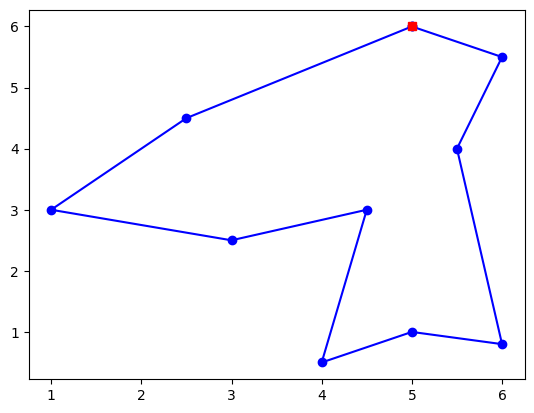

10 city tour; total distance = 18.2; time = 0.000 secs for dummy_TSP


In [ ]:
import time
import matplotlib.pyplot as plt

# Fungsi untuk menghitung jarak total dari tur
def total_distance(tour):
    return sum(abs(tour[i] - tour[i-1]) for i in range(1, len(tour)))

# Fungsi untuk memplot tur
def plot_tour(algorithm, cities):
    "Apply a TSP algorithm to cities, and plot the resulting tour."

    # Menghitung waktu eksekusi dan hasilkan tur
    t0 = time.time()
    tour = algorithm(cities)
    t1 = time.time()

    # Plot tur: Menutup tur dengan menghubungkan kembali ke titik awal
    plotline(list(tour) + [tour[0]])
    plotline([tour[0]], 'rs')  # 'rs' untuk menandai titik awal dengan warna merah
    plt.show()

    # Mencetak informasi tur
    print("{} city tour; total distance = {:.1f}; time = {:.3f} secs for {}".format(
        len(tour), total_distance(tour), t1 - t0, algorithm.__name__))

# Fungsi untuk memplot garis
def plotline(points, style='bo-'):
    "Plot a list of points (complex numbers) in the 2-D plane."
    x, y = XY(points)
    plt.plot(x, y, style)

# Fungsi untuk mengonversi daftar kota menjadi koordinat X dan Y
def XY(points):
    "Given a list of points, return two lists: X coordinates, and Y coordinates."
    return [p.real for p in points], [p.imag for p in points]

# Dummy TSP algorithm sebagai contoh
def dummy_TSP(cities):
    return cities  # Misalkan algoritma hanya mengembalikan kota-kota apa adanya

# Contoh penggunaan
cities8 = [complex(5, 6), complex(2.5, 4.5),complex(1, 3), complex(3, 2.5), complex(4.5, 3), complex(4, 0.5), complex(5, 1), complex(6, 0.8), complex(5.5, 4), complex(6, 5.5)]
plot_tour(dummy_TSP, cities8)


<ipython-input-3-8bd6b6fe07b2>:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, style, color=line_color)  # Menghubungkan titik dengan garis biru
<ipython-input-3-8bd6b6fe07b2>:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rs" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, style, color=line_color)  # Menghubungkan titik dengan garis biru


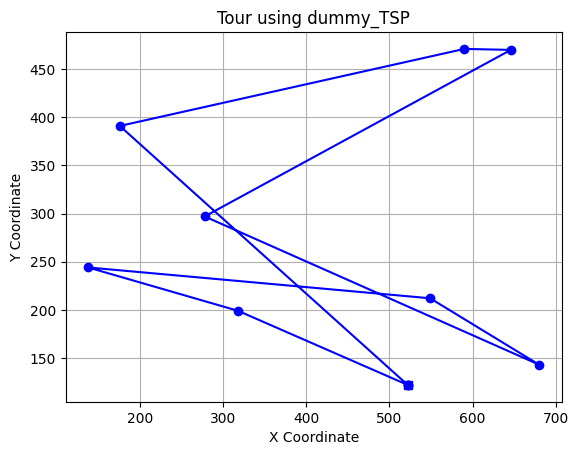

9 city tour; total distance = 2278.7; time = 0.000 secs for dummy_TSP


In [3]:
import random
import matplotlib.pyplot as plt

# Fungsi untuk menghitung jarak total dari tur
def total_distance(tour):
    return sum(abs(tour[i] - tour[i-1]) for i in range(1, len(tour)))

# Fungsi untuk memplot tur
def plot_tour(algorithm, cities):
    "Apply a TSP algorithm to cities, and plot the resulting tour."

    # Menghitung waktu eksekusi dan hasilkan tur
    t0 = time.time()
    tour = algorithm(cities)
    t1 = time.time()

    # Plot tur: Menutup tur dengan menghubungkan kembali ke titik awal
    plotline(list(tour) + [tour[0]], 'bo-', 'blue')  # Gaya garis biru
    plotline([tour[0]], 'rs')  # Menandai titik awal dengan warna merah

    plt.title(f"Tour using {algorithm.__name__}")
    plt.grid(True)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

    # Mencetak informasi tur
    print("{} city tour; total distance = {:.1f}; time = {:.3f} secs for {}".format(
        len(tour), total_distance(tour), t1 - t0, algorithm.__name__))

# Fungsi untuk memplot garis
def plotline(points, style='bo-', line_color='blue'):
    "Plot a list of points (complex numbers) in the 2-D plane."
    x, y = XY(points)
    plt.plot(x, y, style, color=line_color)  # Menghubungkan titik dengan garis biru

# Fungsi untuk mengonversi daftar kota menjadi koordinat X dan Y
def XY(points):
    "Given a list of points, return two lists: X coordinates, and Y coordinates."
    return [p.real for p in points], [p.imag for p in points]

# Dummy TSP algorithm sebagai contoh
def dummy_TSP(cities):
    return cities  # Misalkan algoritma hanya mengembalikan kota-kota apa adanya

# Fungsi untuk membuat kota-kota
def Cities(n):
    return [complex(random.randrange(100, 800), random.randrange(100, 500)) for i in range(n)]

# Contoh penggunaan
cities = Cities(9)
plot_tour(dummy_TSP, cities)


In [1]:
# A Huffman Tree Node
import heapq

class node:
    def __init__(self, freq, symbol, left=None, right=None):
        # Frequency of symbol
        self.freq = freq

        # Symbol name (character)
        self.symbol = symbol

        # Node left of current node
        self.left = left

        # Node right of current node
        self.right = right

        # Tree direction (0/1)
        self.huff = ''

    # Defining the comparison operator for heapq
    def __lt__(self, nxt):
        return self.freq < nxt.freq

# Utility function to print Huffman codes for all symbols in the newly created Huffman tree
def printNodes(node, val=''):
    # Huffman code for current node
    newVal = val + str(node.huff)

    # If node is not an edge node, traverse inside it
    if(node.left):
        printNodes(node.left, newVal)
    if(node.right):
        printNodes(node.right, newVal)

    # If node is edge node then display its Huffman code
    if(not node.left and not node.right):
        print(f"{node.symbol} -> {newVal}")

# Characters for Huffman tree
chars = ['a', 'b', 'c', 'd', 'e', 'f']

# Frequency of characters
freq = [5, 9, 12, 13, 16, 45]

# List containing unused nodes
nodes = []

# Converting characters and frequencies into Huffman tree nodes
for x in range(len(chars)):
    heapq.heappush(nodes, node(freq[x], chars[x]))

# While there are more than one node in the heap
while len(nodes) > 1:
    # Sort all the nodes in ascending order based on their frequency
    left = heapq.heappop(nodes)
    right = heapq.heappop(nodes)

    # Assign directional value to these nodes
    left.huff = 0
    right.huff = 1

    # Combine the 2 smallest nodes to create a new node as their parent
    newNode = node(left.freq + right.freq, left.symbol + right.symbol, left, right)

    heapq.heappush(nodes, newNode)

# Huffman Tree is ready!
printNodes(nodes[0])


f -> 0
c -> 100
d -> 101
a -> 1100
b -> 1101
e -> 111
